# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?
Trees are constructed by splitting the data on a key feature, such as mean square error or entropy. Based on this key feature, the tree splits the data and creates leaf nodes

2. How do trees handle non-linear relationships between variables? Compare this to linear models.
Trees are able to capture nonlinear relationships due to how they are set up. Since trees ask yes no questions and data can be split at multiple points, trees are able to handle these nonlinear relationships without need for modification, which cannot be said of linear models.

3. Why is the Gini a good loss function for categorical target variables?
Gini shows you how many times you would misclassify a random element based on the distribution of the nodes. It provides an easily interpretable measure, with 0 being perfectly pure. It also gives a good measure of class distribution, and helps the algorithm split to reduce impurity.
4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
False, because trees perform well with both categorical variables and numeric variables. As discussed before, trees can handle nonlinear and continuous variables very effectively due to its ability to split at certain numbers, such as age>20.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
Trees are able to handle multi branch splits, it just does not do it directly. This can help to control for overfitting, as well as allowing the model to be easier to understand and require less computing power.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
A tree being very deep or very shallow is an easy way to identify over or under fitting. The number of leaf nodes is another way to check for over and under fitting. If the model shows perfect or near perfect accuracy, then it is probably overfit.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data? 5 is the best choice, as it results in the highest R^2 value.

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?
The tree performs slightly better on the test set, as its R^2 is higher.
5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.
It looks like a mostly linear relationship that follows the 45 degree line.

Number of Observations: 976
Number of Features: 12
Available Variables: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']

First few rows of data:
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manu

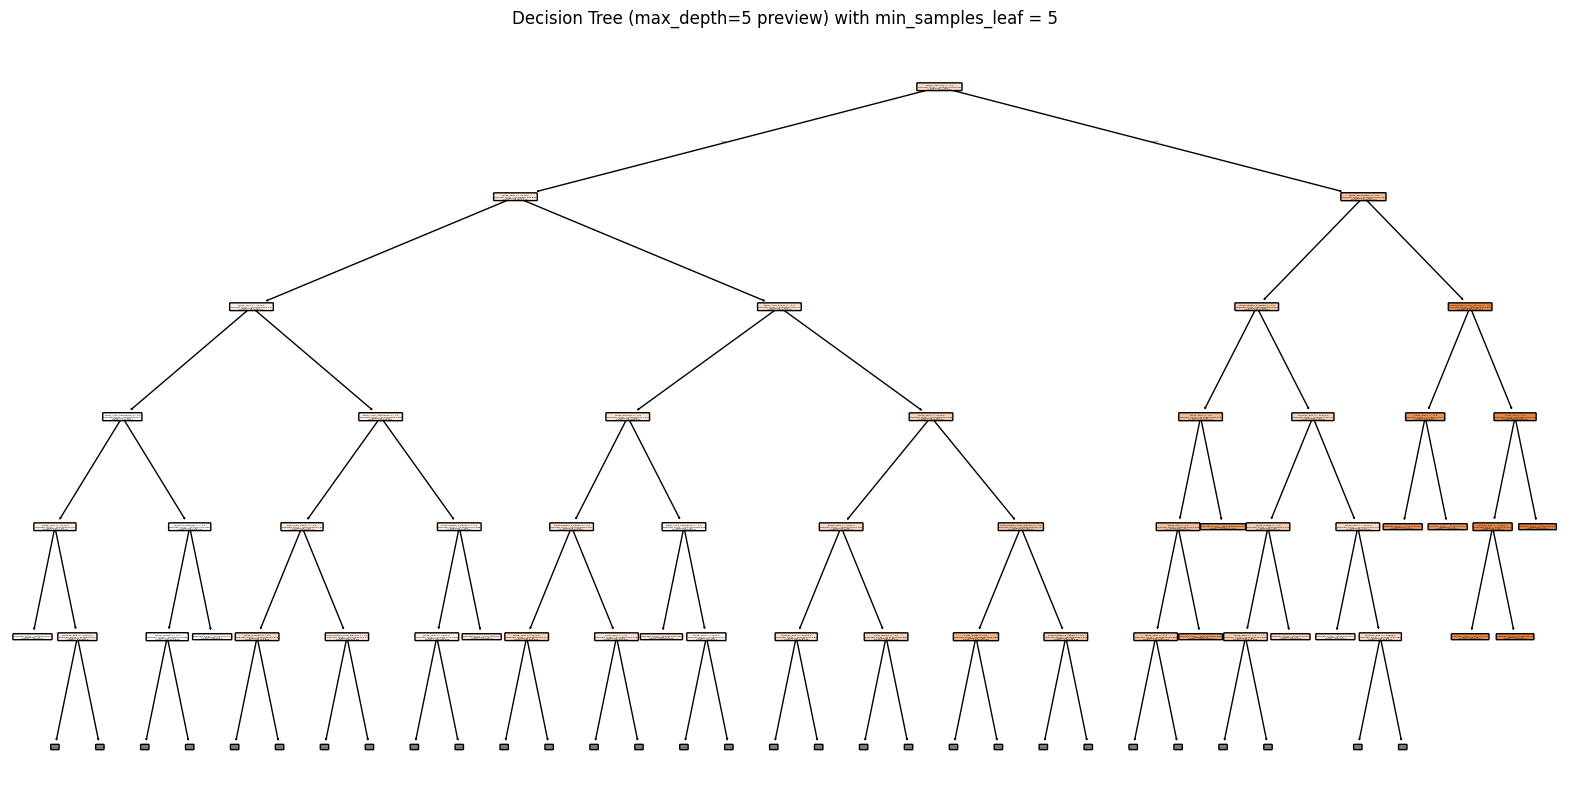

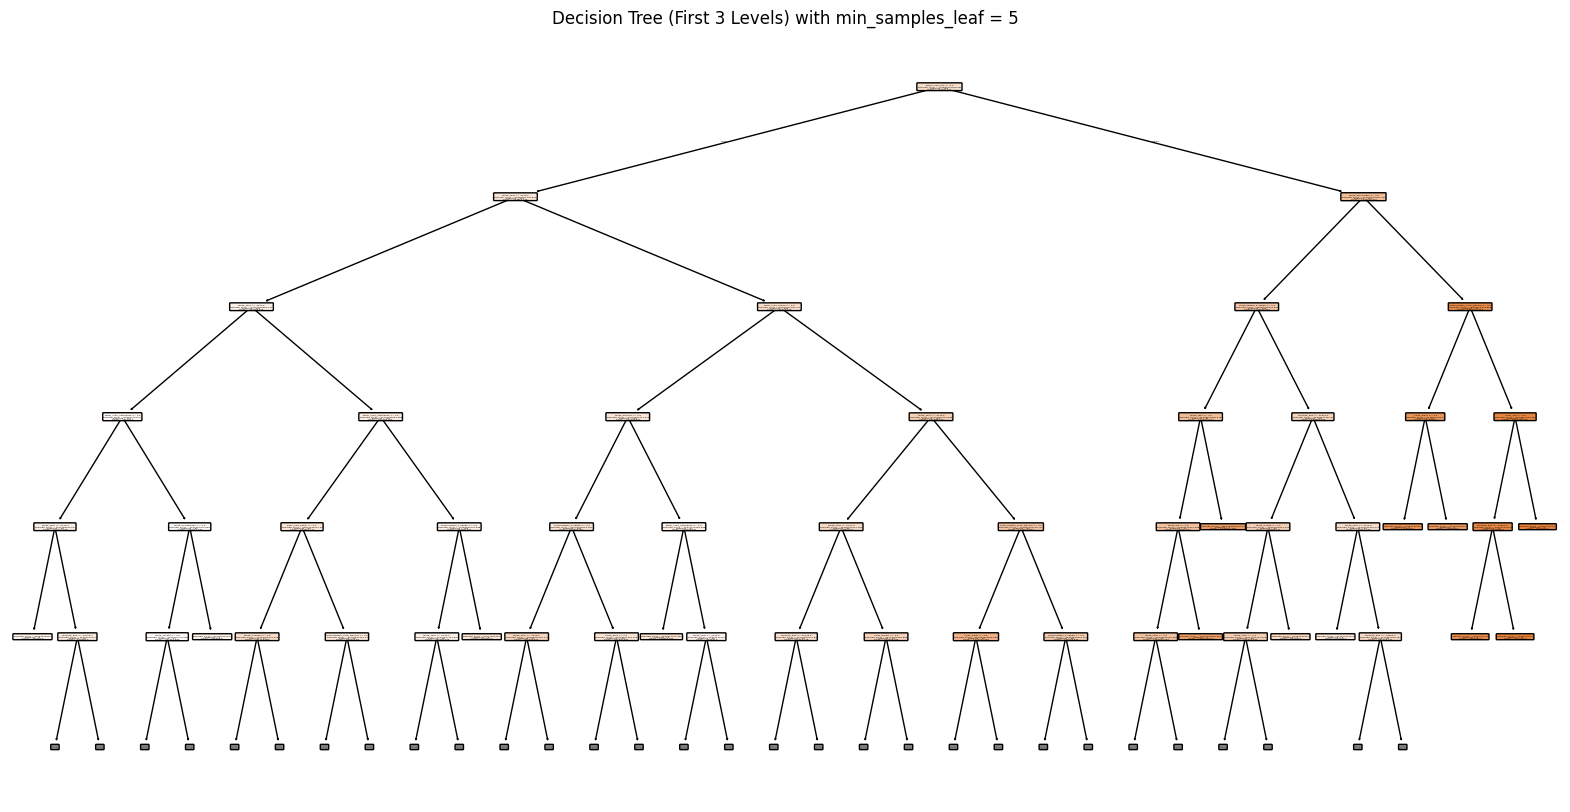

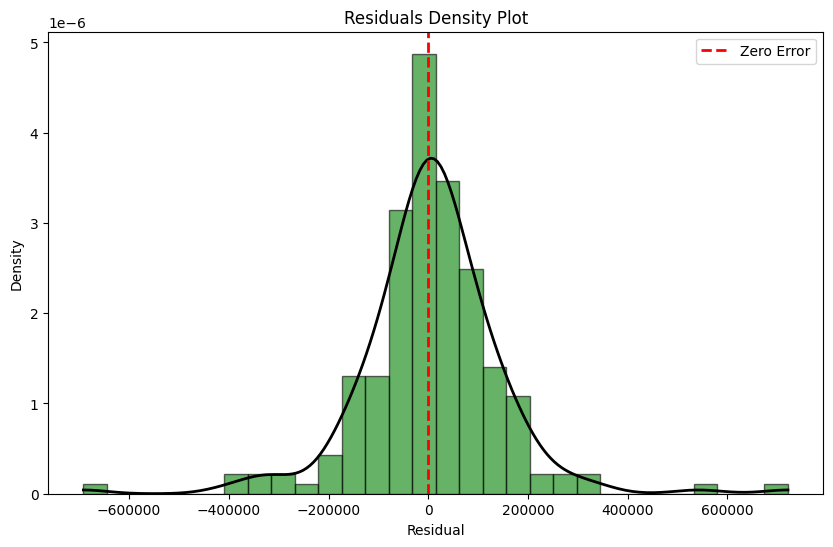


Linear Regression:
  R² on test set: 0.8203
  RMSE on test set: 143575.1966


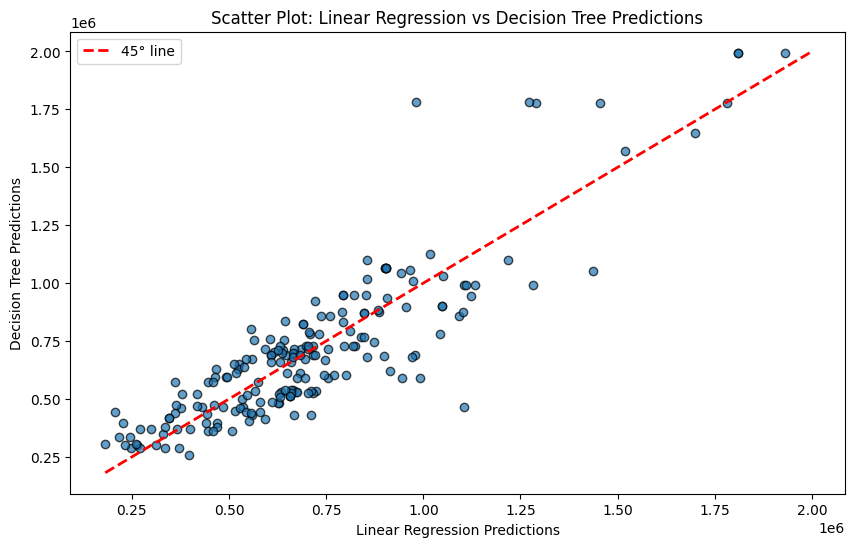

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import gaussian_kde
from sklearn.linear_model import LinearRegression

# Used ChatGPT for code assistance

# Load the CSV file
df = pd.read_csv('cars_hw.csv')

# Get shape
num_observations, num_features = df.shape

# Get list of variables
variables = df.columns.tolist()

# Get the first few rows of the data
first_rows = df.head()

print("Number of Observations:", num_observations)
print("Number of Features:", num_features)
print("Available Variables:", variables)
print("\nFirst few rows of data:")
print(first_rows)

from sklearn.model_selection import train_test_split


# Specify the columns
categorical_columns = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numeric_columns = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target = 'Price'

df_cat_dummies = pd.get_dummies(df[categorical_columns], drop_first=True)

# Prepare dataframe for numeric variables
df_numeric = df[numeric_columns]

# Combine numeric and encoded categorical data into a single features dataframe
X = pd.concat([df_numeric, df_cat_dummies], axis=1)
y = df[target]

# Split the dataset into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify the split
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

r2_scores = {}

# Iterate over possible values of min_samples_leaf from 1 to 25
for min_samples_leaf in range(1, 26):
    # Initialize the DecisionTreeRegressor with the given min_samples_leaf
    regressor = DecisionTreeRegressor(random_state=42, min_samples_leaf=min_samples_leaf)
    regressor.fit(X_train, y_train)

    # Predict on the test set and compute the R2 score
    y_pred = regressor.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_scores[min_samples_leaf] = score
    print(f"min_samples_leaf = {min_samples_leaf}  -> Test R2: {score:.4f}")

# Identify the min_samples_leaf value achieving the best test R2 score
best_min_samples_leaf = max(r2_scores, key=r2_scores.get)
best_r2 = r2_scores[best_min_samples_leaf]
print("\nBest parameter:")
print(f"min_samples_leaf = {best_min_samples_leaf} with Test R2 = {best_r2:.4f}")



best_model = DecisionTreeRegressor(random_state=42, min_samples_leaf=best_min_samples_leaf)
best_model.fit(X_train, y_train)


model = DecisionTreeRegressor(random_state=42, min_samples_leaf=5)
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, rounded=True, max_depth=5)
plt.title(f"Decision Tree (max_depth=5 preview) with min_samples_leaf = {best_min_samples_leaf}")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True, max_depth=5)
plt.title("Decision Tree (First 3 Levels) with min_samples_leaf = 5")
plt.show()


residuals = y_test - y_pred


plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

density = gaussian_kde(residuals)
xs = np.linspace(residuals.min(), residuals.max(), 200)
plt.plot(xs, density(xs), 'k', linewidth=2)
plt.xlabel("Residual")
plt.ylabel("Density")
plt.title("Residuals Density Plot")
plt.axvline(0, color='red', linestyle='dashed', linewidth=2, label="Zero Error")
plt.legend()
plt.show()
tree_model = DecisionTreeRegressor(random_state=42, min_samples_leaf=3)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
y_pred_lin = linreg_model.predict(X_test)

# Compute metrics for the linear regression model
linreg_r2 = r2_score(y_test, y_pred_lin)
linreg_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print("\nLinear Regression:")
print("  R² on test set: {:.4f}".format(linreg_r2))
print("  RMSE on test set: {:.4f}".format(linreg_rmse))

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lin, y_pred_tree, alpha=0.7, edgecolor='k')
plt.xlabel("Linear Regression Predictions")
plt.ylabel("Decision Tree Predictions")
plt.title("Scatter Plot: Linear Regression vs Decision Tree Predictions")
# Plot 45-degree line for reference (where predictions would be identical)
min_pred = min(np.min(y_pred_lin), np.min(y_pred_tree))
max_pred = max(np.max(y_pred_lin), np.max(y_pred_tree))
plt.plot([min_pred, max_pred], [min_pred, max_pred], color="red", linestyle="--", linewidth=2, label="45° line")
plt.legend()
plt.show()

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? The model is 61.5% accurate, being more accurate at predicting positives than negatives.


4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?
The model tends to perform better with the true positive rate.
5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?
This model seems insufficient for clinical purposes, as the R^2 and accuracy are better than guessing but not particularly high.

The dataset contains 2509 observations and 34 variables.

First few rows of data:
  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subtype  Cohort ER statu

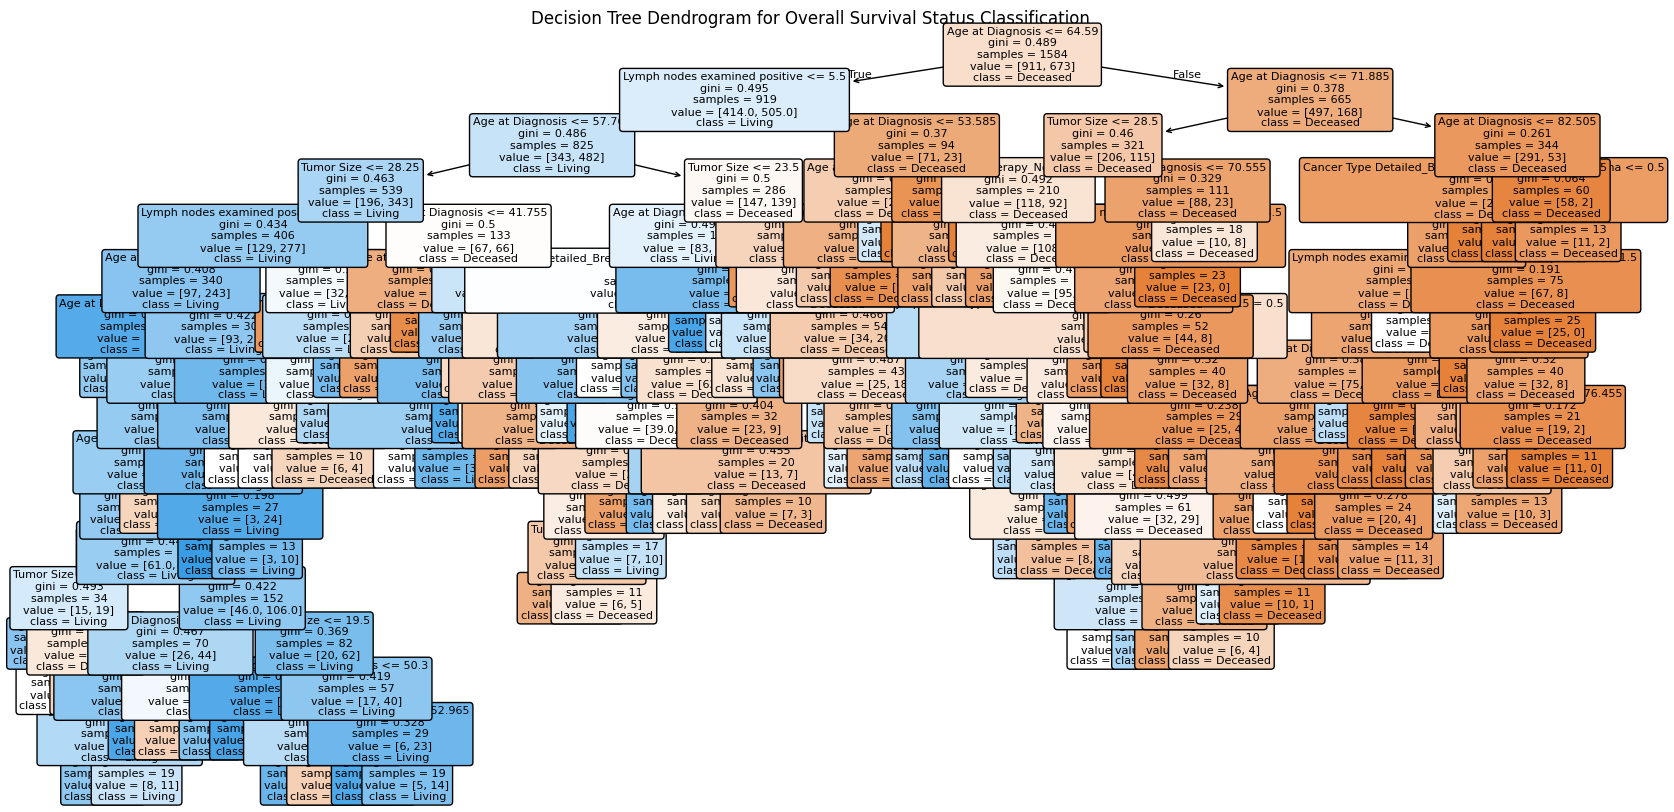

Confusion Matrix:
[[ 81  83]
 [ 71 162]]

Accuracy: 0.612

True Positive Rate (Sensitivity): 0.695
True Negative Rate (Specificity): 0.494
The model tends to perform better in terms of sensitivity (true positive rate).

Optimal min_samples_leaf for regression: 125
Test R^2 for regression: 0.133


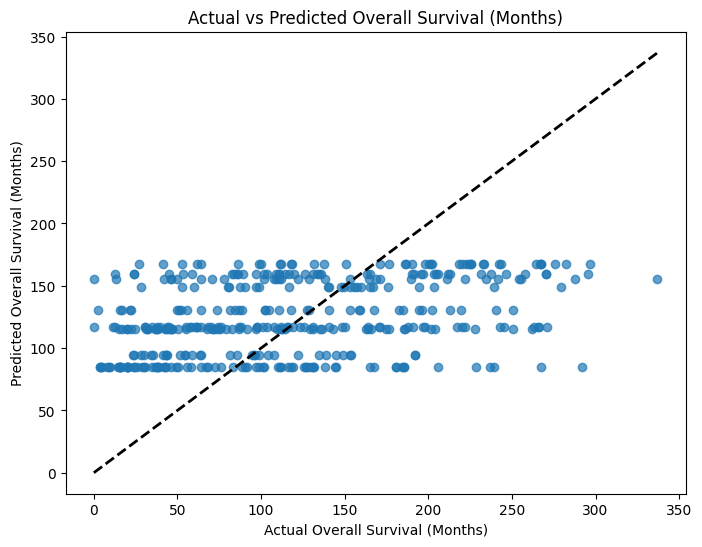


Clinical Evaluation:
The R^2 value represents the proportion of variance in overall survival (in months) explained by the model. Although the optimal min_samples_leaf was found to be around 125 (yielding an R^2 of 0.133), decision trees can be unstable and may be overly optimistic on the training data while underperforming in new, unseen cases. For clinical purposes, a more robust (and possibly ensemble) model along with thorough validation would be required before making any clinical decisions.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score

# Load the dataset
df = pd.read_csv("Breast Cancer METABRIC.csv")

# Get the number of observations and variables
observations, variables = df.shape
print(f"The dataset contains {observations} observations and {variables} variables.\n")

# Print the first few rows of the data
print("First few rows of data:")
print(df.head())
def prepare_features(df, target_col):
    num_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
    cat_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']
    X_num = df[num_vars]
    X_cat = pd.get_dummies(df[cat_vars], dummy_na=False, drop_first=False)
    X = pd.concat([X_num, X_cat], axis=1)
    y = df[target_col]
    return X, y

df_class = df.dropna(subset=["Overall Survival Status"])
X_class, y_class = prepare_features(df_class, "Overall Survival Status")
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)
clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train_class, y_train_class)
plt.figure(figsize=(20,10))
plot_tree(
    clf,
    filled=True,
    feature_names=X_train_class.columns,
    class_names=clf.classes_,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Dendrogram for Overall Survival Status Classification")
plt.show()
y_pred_class = clf.predict(X_test_class)
cm = confusion_matrix(y_test_class, y_pred_class, labels=["Living", "Deceased"])
acc = accuracy_score(y_test_class, y_pred_class)
print("Confusion Matrix:")
print(cm)
print(f"\nAccuracy: {acc:.3f}")
TN, FP = cm[0, 0], cm[0, 1]
FN, TP = cm[1, 0], cm[1, 1]
TPR = TP / (TP + FN) if (TP + FN) > 0 else np.nan
TNR = TN / (TN + FP) if (TN + FP) > 0 else np.nan
print(f"\nTrue Positive Rate (Sensitivity): {TPR:.3f}")
print(f"True Negative Rate (Specificity): {TNR:.3f}")
if TPR > TNR:
    print("The model tends to perform better in terms of sensitivity (true positive rate).")
elif TNR > TPR:
    print("The model tends to perform better in terms of specificity (true negative rate).")
else:
    print("The model performs similarly in terms of sensitivity and specificity.")

df_reg = df.dropna(subset=["Overall Survival (Months)"])
X_reg, y_reg = prepare_features(df_reg, "Overall Survival (Months)")
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)
min_samples_range = range(10, 151, 5)
best_msl = None
best_r2 = -np.inf
r2_scores = {}
for msl in min_samples_range:
    reg = DecisionTreeRegressor(min_samples_leaf=msl, random_state=42)
    reg.fit(X_train_reg, y_train_reg)
    y_pred_reg = reg.predict(X_test_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    r2_scores[msl] = r2
    if r2 > best_r2:
        best_r2 = r2
        best_msl = msl
print(f"\nOptimal min_samples_leaf for regression: {best_msl}")
print(f"Test R^2 for regression: {best_r2:.3f}")
reg_opt = DecisionTreeRegressor(min_samples_leaf=best_msl, random_state=42)
reg_opt.fit(X_train_reg, y_train_reg)
y_pred_opt = reg_opt.predict(X_test_reg)
plt.figure(figsize=(8,6))
plt.scatter(y_test_reg, y_pred_opt, alpha=0.7)
plt.xlabel("Actual Overall Survival (Months)")
plt.ylabel("Predicted Overall Survival (Months)")
plt.title("Actual vs Predicted Overall Survival (Months)")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.show()


**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?